In [35]:
import numpy as np
import matplotlib.pyplot as plt
import fractions as frac
import pandas as pd

In [36]:
def cmp_fun(k):
    return (4**(-k))/3

In [37]:
def x_n(n: int, x0, x1, type):
    x = np.zeros(n, dtype=type) 
    x[0] = x0
    x[1] = x1

    for i in range(2,n):
        x[i] = 2.25*x[i-1] - 0.5*x[i-2]
    
    return x

In [52]:
def x_n_fraction(n: int, x0, x1):
    x = [frac.Fraction(0,1) for _ in range(n)]
    x[0] = x0
    x[1] = x1

    for i in range(2,n):
        x[i] = frac.Fraction(9,4) * x[i-1] - frac.Fraction(1,2) * x[i-2]
    
    return x

In [56]:
ys_float_32 = x_n(225,1/3,1/12,np.float32)

In [55]:
ys_float_64 = x_n(60,1/3,1/12,np.float64)

In [53]:
ys_fraction = x_n_fraction(225,frac.Fraction(1,3), frac.Fraction(1,12))

In [54]:
ys_cmp225 = np.array([cmp_fun(i) for i in range(225)])
ys_cmp60 = np.array([cmp_fun(i) for i in range(60)])

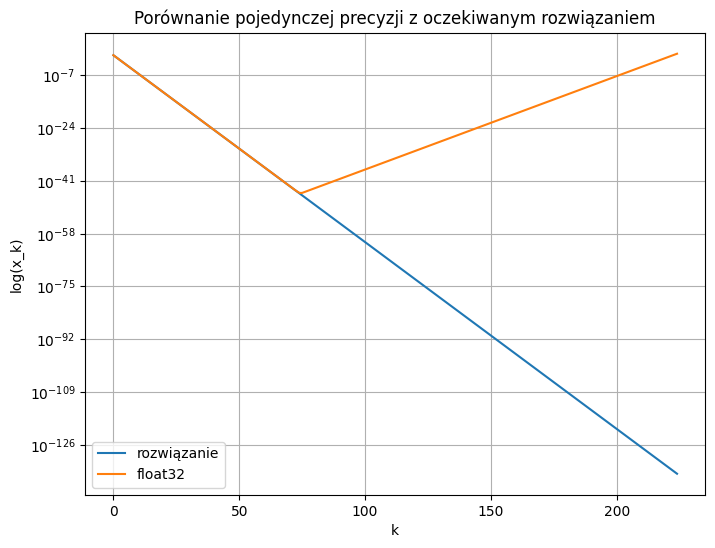

In [57]:
xs = np.arange(0,225)
plt.figure(figsize=(8,6))
plt.grid(visible=True)
plt.semilogy(xs,ys_cmp225,label="rozwiązanie")
plt.semilogy(xs,ys_float_32,label="float32")
plt.legend()
plt.title("Porównanie pojedynczej precyzji z oczekiwanym rozwiązaniem")
plt.xlabel("k")
plt.ylabel(r'log(x_k)')
plt.show()

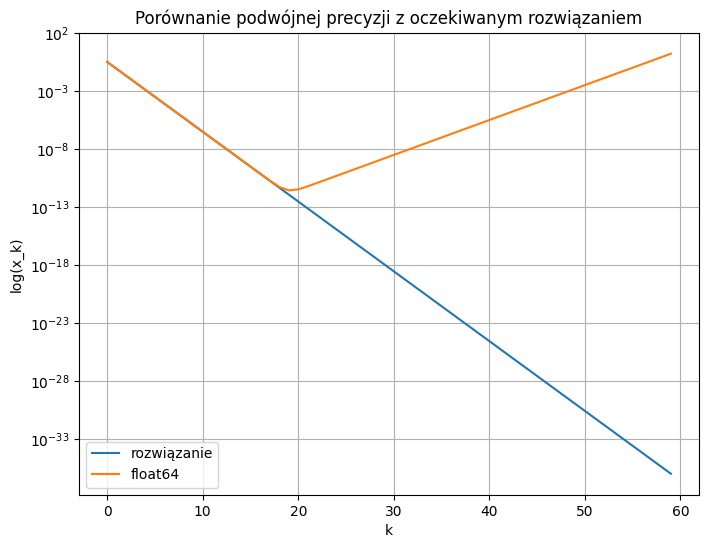

In [58]:
xs = np.arange(0,60)
plt.figure(figsize=(8,6))
plt.grid(visible=True)
plt.semilogy(xs,ys_cmp60, label="rozwiązanie")
plt.semilogy(xs,ys_float_64, label="float64")
plt.title("Porównanie podwójnej precyzji z oczekiwanym rozwiązaniem")
plt.xlabel("k")
plt.ylabel("log(x_k)")
plt.legend()
plt.show()

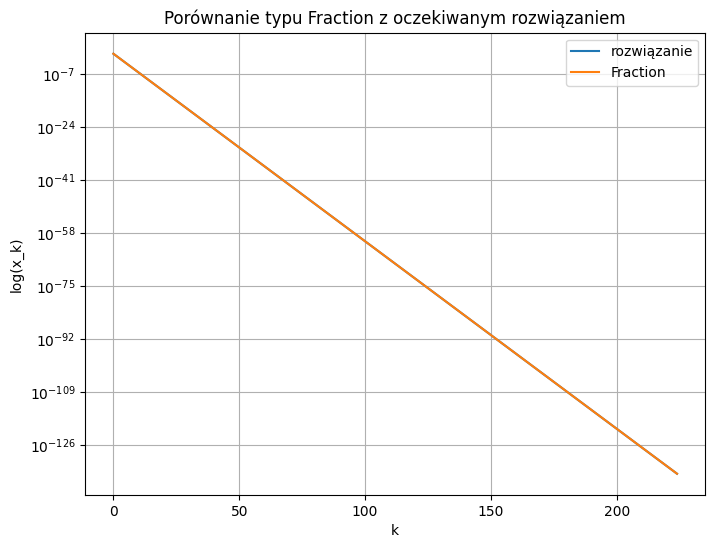

In [59]:
xs = np.arange(0,225)
plt.figure(figsize=(8,6))
plt.grid(visible=True)
plt.semilogy(xs,ys_cmp225, label="rozwiązanie")
plt.semilogy(xs,ys_fraction, label="Fraction")
plt.title("Porównanie typu Fraction z oczekiwanym rozwiązaniem")
plt.xlabel("k")
plt.ylabel("log(x_k)")
plt.legend()
plt.show()

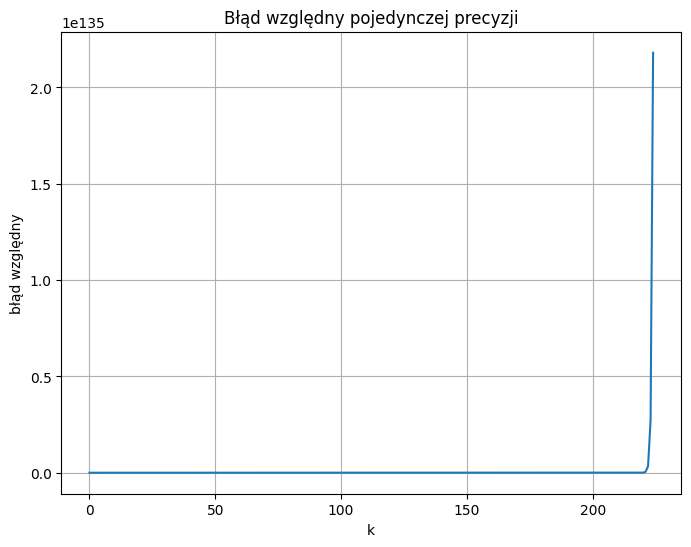

In [60]:
xs = np.arange(0,225)
plt.figure(figsize=(8,6))
plt.grid(visible=True)
ys_float_32_error = abs(ys_float_32 - ys_cmp225)/ys_cmp225
plt.plot(xs,ys_float_32_error)
plt.title("Błąd względny pojedynczej precyzji")
plt.xlabel('k')
plt.ylabel("błąd względny")
plt.show()

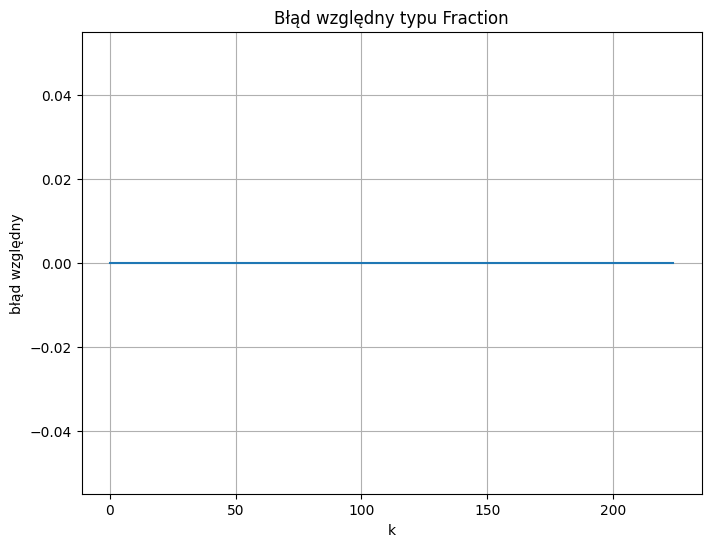

In [61]:
xs = np.arange(0,225)
plt.figure(figsize=(8,6))
plt.grid(visible=True)
ys_fraction_error = abs(ys_fraction - ys_cmp225)/ys_cmp225
plt.plot(xs,ys_fraction_error)
plt.title("Błąd względny typu Fraction")
plt.xlabel('k')
plt.ylabel("błąd względny")
plt.show()

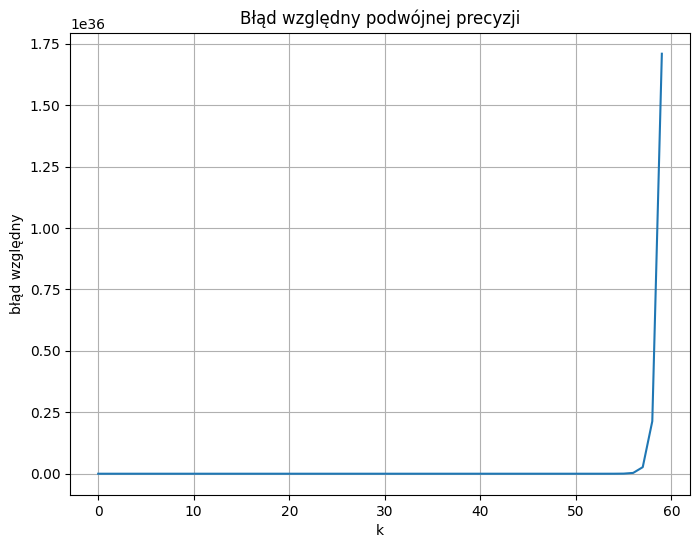

In [62]:
xs = np.arange(0,60)
plt.figure(figsize=(8,6))
plt.grid(visible=True)
ys_float_64_error = abs(ys_float_64 - ys_cmp60)/ys_cmp60
plt.plot(xs,ys_float_64_error)
plt.title("Błąd względny podwójnej precyzji")
plt.xlabel('k')
plt.ylabel("błąd względny")
plt.show()

In [63]:
df225 = pd.DataFrame()
df225["float32"] = ys_float_32
df225["fraction"] = ys_fraction
df225["solution"] = ys_cmp225
df225["error float32"] = abs(ys_float_32 - ys_cmp225)/ys_cmp225
df225["error fraction"] = abs(ys_fraction - ys_cmp225)/ys_cmp225
df225 = df225.rename_axis('k', axis='columns')
df225

k,float32,fraction,solution,error float32,error fraction
0,0.333333,1/3,3.333333e-01,2.980232e-08,0.0
1,0.083333,1/12,8.333333e-02,2.980232e-08,0.0
2,0.020833,1/48,2.083333e-02,2.980232e-08,0.0
3,0.005208,1/192,5.208333e-03,2.980232e-08,0.0
4,0.001302,1/768,1.302083e-03,2.980232e-08,0.0
...,...,...,...,...,...
220,0.062500,1/85176413003391432486248883736875531369567346...,1.174034e-133,5.323526e+131,0.0
221,0.125000,1/34070565201356572994499553494750212547826938...,2.935085e-134,4.258821e+132,0.0
222,0.250000,1/13628226080542629197799821397900085019130775...,7.337712e-135,3.407057e+133,0.0
223,0.500000,1/54512904322170516791199285591600340076523102...,1.834428e-135,2.725645e+134,0.0


In [64]:
df60 = pd.DataFrame()
df60["float64"] = ys_float_64
df60["solution"] = ys_cmp60
df60['error float64'] = abs(ys_float_64-ys_cmp60)/ys_cmp60
df60 = df60.rename_axis('k', axis='columns')
df60

k,float64,solution,error float64
0,3.333333e-01,3.333333e-01,0.000000e+00
1,8.333333e-02,8.333333e-02,0.000000e+00
2,2.083333e-02,2.083333e-02,4.996004e-16
3,5.208333e-03,5.208333e-03,4.496403e-15
4,1.302083e-03,1.302083e-03,3.647083e-14
5,3.255208e-04,3.255208e-04,2.922662e-13
6,8.138021e-05,8.138021e-05,2.338629e-12
7,2.034505e-05,2.034505e-05,1.870953e-11
8,5.086263e-06,5.086263e-06,1.496768e-10
9,1.271566e-06,1.271566e-06,1.197415e-09
